## Spam Detection on SMS messages 

### Summary
This notebook is to test 2 natural language process (NLP) vectorizers
 - Bag of Words
 - TF-IDF 

and 5 classifiers:
 - Logistic Regression
 - SVC
 - K-Neighbour
 - NaiveBayes
 - RandomForest

on SMS spam detection. The dataset credit goes to [here](http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/)

The classifier parameters are already optimized, which are based on notebook:
[Spam detection Classifiers hyperparameter tuning](https://www.kaggle.com/muzzzdy/d/uciml/sms-spam-collection-dataset/spam-detection-classifiers-hyperparameter-tuning/)

### Steps
 - Import data and remove unnecessary columns.
 - Exploratory data analysis including ham (legitimate) and spam messages count and length.
 - Pre-process data including remove any punctuation and stopwords
 - Set-up work flow
     - feature extraction using vectorizer
     - split data into train and test set
     - train classifier using training dataset
     - predict labels for test set using trained classifier
     - calculate accuracy score 
 - Loop through the work flow using 2 vectorizers and 5 classifiers, the classifiers are already optimized.
 - Visualize and compare the results.
 
### Conclusions
 
**Naive Bayes** classifier with **TF-IDF** vectorizer outperforms other approaches with an accuracy score of **0.98**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
%matplotlib inline

In [2]:
df = pd.read_csv('datasets_483_982_spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# clean data frame
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis = 1)
df = df.rename(columns = {'v1':'label','v2':'message'})
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# check out the data
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [5]:
# create new feature "message length" and visualize it
df['length'] = df['message'].apply(len)
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


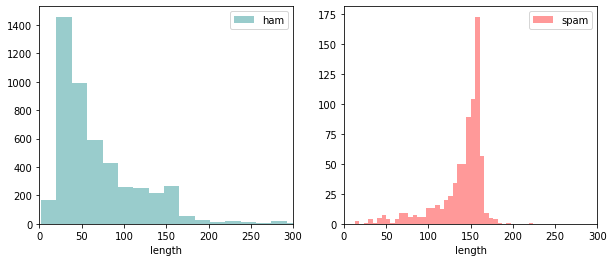

In [6]:
f, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
plt.xlim(0, 300)
sns.distplot(df.length[df.label=='ham'], color='teal', label='ham', kde=False, ax=axes[0]);
sns.distplot(df.length[df.label=='spam'], color='red', label='spam', kde=False, ax=axes[1]);
axes[0].legend();
axes[1].legend();

In [7]:
# function to pre-process of the messages, remove any punctuation and stopwords
def text_preprocess(text):    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]    
    return " ".join(text)

In [8]:
text_raw = df['message'].copy()
text_cleaned = text_raw.apply(text_preprocess)

In [9]:
# set up two vectorizers and five classifiers
count_v = CountVectorizer()
tfidf_v = TfidfVectorizer()
vectorizers = {'BagOfWords': count_v,'TF-IDF': tfidf_v}

random_num = 7
lrc = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
nbc = MultinomialNB(alpha=0.2)
rfc = RandomForestClassifier(n_estimators=31, random_state=random_num)
clfs = {'LogisticRegression':lrc, 'SVC':svc, 'KNeighbour': knc, 'NaiveBayes': nbc, 'RandomForest': rfc}

In [10]:
# functions to train and predict with specific classifier
def train_classifier(clf, X_train, y_train):    
    clf.fit(X_train, y_train)

def predict_labels(clf, X_test):
    return (clf.predict(X_test))

In [11]:
pred_scores = []

# loop over 2 vectorizers and 5 classifiers to calculate the score and put into 10x3 matrix,
# where classifier name in 1st, vectorizer name in 2nd, accuracy score in 3rd column
for vec_name, vectorizer in vectorizers.items():
    features = vectorizer.fit_transform(text_cleaned)
    X_train, X_test, y_train, y_test = train_test_split(features, df['label'], test_size=0.3, random_state=random_num)
    for clf_name, clf in clfs.items():
        train_classifier(clf, X_train, y_train)
        pred = predict_labels(clf, X_test)      
        pred_scores.append([clf_name, vec_name, accuracy_score(y_test,pred)])

In [12]:
pred_scores

[['LogisticRegression', 'BagOfWords', 0.9712918660287081],
 ['SVC', 'BagOfWords', 0.9294258373205742],
 ['KNeighbour', 'BagOfWords', 0.8636363636363636],
 ['NaiveBayes', 'BagOfWords', 0.9742822966507177],
 ['RandomForest', 'BagOfWords', 0.9569377990430622],
 ['LogisticRegression', 'TF-IDF', 0.9413875598086124],
 ['SVC', 'TF-IDF', 0.972488038277512],
 ['KNeighbour', 'TF-IDF', 0.9234449760765551],
 ['NaiveBayes', 'TF-IDF', 0.9796650717703349],
 ['RandomForest', 'TF-IDF', 0.9557416267942583]]

In [13]:
df_score = pd.DataFrame(pred_scores, columns = ['Clf_Name','Vectorizer','Accuracy_Score'])
df_score

,Clf_Name,Vectorizer,Accuracy_Score
0,LogisticRegression,BagOfWords,0.971292
1,SVC,BagOfWords,0.929426
2,KNeighbour,BagOfWords,0.863636
3,NaiveBayes,BagOfWords,0.974282
4,RandomForest,BagOfWords,0.956938
5,LogisticRegression,TF-IDF,0.941388
6,SVC,TF-IDF,0.972488
7,KNeighbour,TF-IDF,0.923445
8,NaiveBayes,TF-IDF,0.979665
9,RandomForest,TF-IDF,0.955742


In [14]:
# check out accuracy_score with descending order
df_score.sort_values(by = 'Accuracy_Score',ascending=False)

,Clf_Name,Vectorizer,Accuracy_Score
8,NaiveBayes,TF-IDF,0.979665
3,NaiveBayes,BagOfWords,0.974282
6,SVC,TF-IDF,0.972488
0,LogisticRegression,BagOfWords,0.971292
4,RandomForest,BagOfWords,0.956938
9,RandomForest,TF-IDF,0.955742
5,LogisticRegression,TF-IDF,0.941388
1,SVC,BagOfWords,0.929426
7,KNeighbour,TF-IDF,0.923445
2,KNeighbour,BagOfWords,0.863636


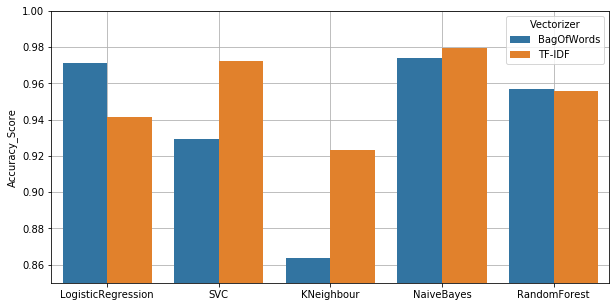

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='Clf_Name', y='Accuracy_Score', hue='Vectorizer', data=df_score);
plt.grid(True)
ax.set_axisbelow(True) # set grid line behind the barplot
ax.set_ylim(0.85,1);
plt.xlabel('');

**Naive Bayes** classifier with **TF-IDF** vectorizer outperforms other approaches with an accuracy score of **0.98**